### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection and Processing

In [2]:
#reading data
df=pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#getting no of rows and columns of dataset
df.shape

(418, 12)

In [42]:
#data information
#df.info()

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

 ### Handling Missing Values

In [7]:
#drop cabin column since many null, also irrelevant
#also since id,name,ticket and are irrevelant data we drop them 
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [8]:
df.isnull().sum() 

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Data Analysis

In [43]:
#getting statistical measures on data
#df.describe()

In [12]:
#number of survivors and deaths
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

### Data Visualization

In [13]:
sns.set()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


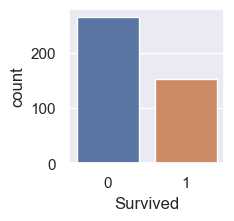

In [45]:
plt.figure(figsize=(2, 2))
sns.countplot('Survived',data=df)
plt.show()


In [15]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


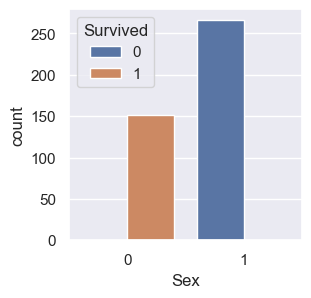

In [47]:
#countplot on gender
plt.figure(figsize=(3, 3))
sns.countplot('Sex',hue='Survived',data=df)
plt.show()

In [17]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


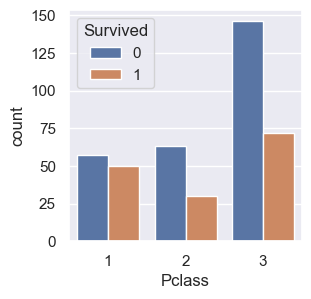

In [48]:
plt.figure(figsize=(3, 3))
sns.countplot('Pclass',hue='Survived',data=df)
plt.show()

In [19]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


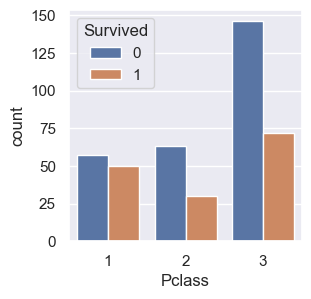

In [49]:
plt.figure(figsize=(3, 3))
sns.countplot('Pclass',hue='Survived',data=df)
plt.show()

### Encoding Categorical Columns

In [50]:
#'Sex':{'male':0,'female':1},'Embarked':{'S': 0, 'C': 1, 'Q': 2}

label_encoder=LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [22]:
x=df.iloc[:,1:]
y=df['Survived']

x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

### Splitting Data into Training and Testing Data

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [25]:
x.shape,x_train.shape,x_test.shape

((418, 7), (292, 7), (126, 7))

### Training Data Model

In [26]:
model=LogisticRegression()

In [27]:
#training model with training sets
model.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation

In [28]:
y_pred=model.predict(x_train)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1], dtype=int64)

In [29]:
print("Accuracy score of training data : ",accuracy_score(y_train,y_pred)*100)

Accuracy score of training data :  100.0


In [30]:
y_test_pred=model.predict(x_test)
y_test_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [31]:
print("Accuracy score of test data : ",accuracy_score(y_test,y_test_pred)*100)

Accuracy score of test data :  100.0


In [32]:
#model.predict([[3,0,47.0,1,0,7.0000,2]])

In [33]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
precision=precision_score(y_test,y_test_pred)
recall=recall_score(y_test,y_test_pred)
f1=f1_score(y_test,y_test_pred)
cf=confusion_matrix(y_test,y_test_pred)
# print the results
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)
print("Confusion Matrix:\n",cf)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[76  0]
 [ 0 50]]


In [34]:
def predict_outcome(model,test_data):
    #Define a dictionary that maps the predicted integer values to the corresponding labels
    outcome_labels={0:'Sorry! The person did not survive :(',
                    1:'The person survived :)'}

    #Make the prediction
    prediction = model.predict(test_data)

    #Look up the label corresponding to the predicted integer value
    predicted_outcome = outcome_labels[prediction[0]]

    #Print the result
    print(predicted_outcome)

In [35]:
test_data=[[3,0,47.0,1,0,7.0000,2]]
predict_outcome(model,test_data)

The person survived :)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Converting python object hierarchy into a byte stream

In [36]:
import pickle
pickle.dump(model,open('titanic.pkl','wb'))

In [37]:
pickled_model=pickle.load(open('titanic.pkl','rb'))
predict_outcome(pickled_model,test_data)

The person survived :)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
test_data1=[[3,1,34.5,0,0,7.82,1]]
predict_outcome(pickled_model,test_data1)

Sorry! The person did not survive :(


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
test_data2=[[3,0,47.0,1,0,7.00,2]]
predict_outcome(pickled_model,test_data2)

The person survived :)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
test_data3=[[2,1,62.0,0,0,9.68,1]]
predict_outcome(pickled_model,test_data3)

Sorry! The person did not survive :(


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
test_data4=[[3,0,22.0,1,1,12.28,2]]
predict_outcome(pickled_model,test_data4)

The person survived :)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
